In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
validation

,method,name,tol,k,Avg_Precision,Avg_Recall,Avg_PutI,Avg_AbsBias_gender,Avg_Bias_gender,Avg_Skew_gender,Avg_Abs_Skew_gender,Avg_AbsBias_for_Accurate_gender,Avg_AbsBias_skintone,Avg_Bias_skintone,Avg_Skew_skintone,Avg_Abs_Skew_skintone,Avg_AbsBias_for_Accurate_skintone,Avg_Max_MC_Bias,Max_AbsBias
0,Baseline,Baseline,NaN,10.0,0.616667,0.061679,0.616667,0.519792,-0.234375,0.266793,0.562962,0.509987,0.629167,-0.627083,0.314480,0.516119,0.582325,0.569792,0.629167
1,Baseline,Baseline,NaN,25.0,0.521667,0.130445,0.521667,0.458333,-0.239167,0.006998,0.482026,0.453220,0.613333,-0.613333,-0.139497,0.573196,0.550649,0.529167,0.613333
2,Baseline,Baseline,NaN,50.0,0.433750,0.216923,0.433750,0.441042,-0.228958,0.010889,0.466113,0.425938,0.608958,-0.608958,-0.141215,0.549955,0.523957,0.512292,0.608958
3,Baseline,Baseline,NaN,100.0,0.312083,0.312152,0.312083,0.413229,-0.226771,0.174613,0.448836,0.414116,0.619792,-0.619792,-0.074724,0.413902,0.494676,0.499896,0.619792
4,CDI_Sum_intersectional (tol: 0.0),CDI_Sum_intersectional,0.0,10.0,0.616667,0.061679,0.616667,0.519792,-0.234375,0.266793,0.562962,0.509987,0.629167,-0.627083,0.314480,0.516119,0.582325,0.569792,0.629167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,CLIP_intersectional (tol: 460),CLIP_intersectional,460.0,100.0,0.032708,0.032714,0.032708,0.104062,-0.088021,0.332901,0.748657,0.337987,0.428229,-0.428229,0.007549,0.473669,0.399088,0.245000,0.428229
1376,DebiasClip,DebiasClip,NaN,10.0,0.706250,0.070637,0.706250,0.412500,-0.100000,0.297507,0.515052,0.426881,0.490625,-0.486458,0.423238,0.583448,0.494151,0.448958,0.490625
1377,DebiasClip,DebiasClip,NaN,25.0,0.629583,0.157423,0.629583,0.412500,-0.119167,0.129328,0.442449,0.412076,0.526250,-0.525417,-0.008492,0.524026,0.500408,0.457500,0.526250
1378,DebiasClip,DebiasClip,NaN,50.0,0.541042,0.270568,0.541042,0.381875,-0.125208,0.103177,0.428539,0.397519,0.513958,-0.513542,-0.013403,0.511868,0.463227,0.431875,0.513958


In [26]:
def avg_cats(data, col):
    return data.groupby(col).mean(numeric_only=True)

## NOTE: This is an implementation modifying an example from https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
def is_pareto_efficient_simple(data, xcol, ycol, xlowerisbetter=True, ylowerisbetter=False):
    if xlowerisbetter:
        xcost = data[xcol]
    else:
        xcost = -data[xcol]
    if ylowerisbetter:
        ycost = data[ycol]
    else:
        ycost = -data[ycol]
    costs = np.array([xcost, ycost]).T
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]<c, axis=1)  # Keep any point with a lower cost
            is_efficient[i] = True  # And keep self
    return is_efficient

def plot_across_tol(df, k, method_names, axis1, axis2, xlabel=None, ylabel=None, title=None, reverse_x = False, legend=True):
    relevant_k = df[df['k'] == k]

    for method in method_names:
        data_for_method = relevant_k[relevant_k['name'] == method]
        d1 = data_for_method[axis1]
        d2 = data_for_method[axis2]

        if method in ["Baseline", "DebiasClip"]:
            plt.scatter(d1, d2, label=method)
        else:
            plt.plot(d1, d2, label=method)
    if legend: plt.legend()
    if xlabel is not None:
        plt.xlabel(xlabel)
    else:
        plt.xlabel(axis1)
    if ylabel is not None:
        plt.ylabel(ylabel)
    else:
        plt.ylabel(axis2)
    if title is not None:
        plt.title(title)
    else:
        plt.title(f"Graph of {axis2} over {axis1} @ {k}")
    if reverse_x:
        plt.gca().invert_xaxis()
    plt.grid()
    plt.show()


['Baseline' 'CDI_Sum_intersectional' 'CDI_Min_intersectional'
 'PBM_intersectional' 'CLIP_intersectional' 'DebiasClip']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1913731094.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1913731094.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


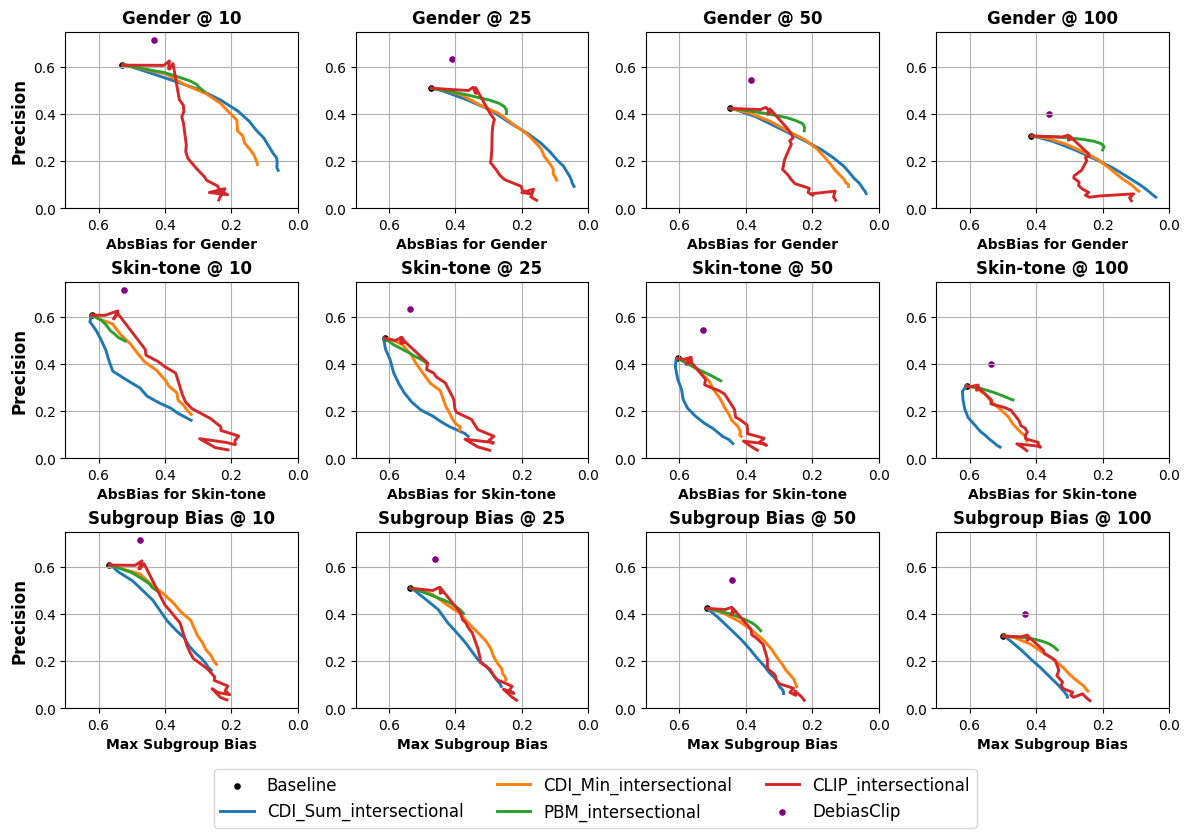

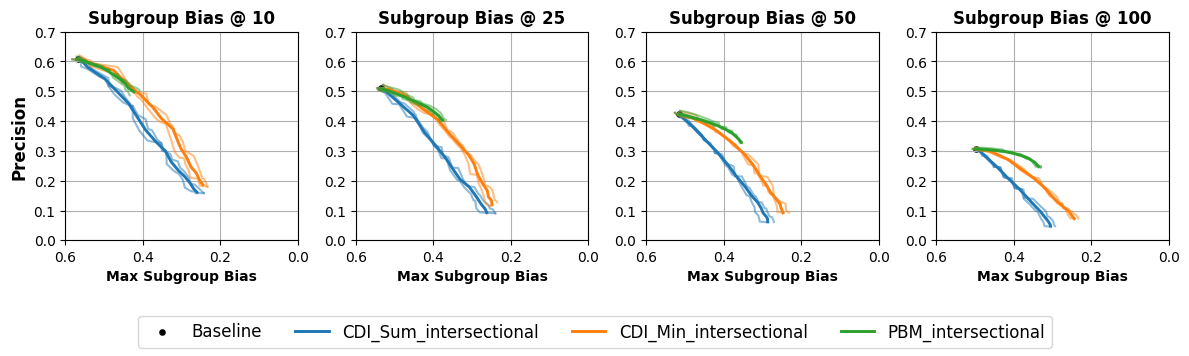

In [99]:

validation = pd.read_pickle('results/occ2-3-29-validation.pkl')

methods = validation['name'].unique()
print(methods)

ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Subgroup Bias']
metrics = ['Avg_AbsBias_gender', 'Avg_AbsBias_skintone', 'Avg_Max_MC_Bias']

fig, ax = plt.subplots(3, 4, figsize=(10, 7))

for i in range(3):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        ax[i, j].set_ylim(0, .75)
        ax[i, j].set_xlim(.7, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision', weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[i, j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[i, j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for method in methods:
            data = validation[(validation['name'] == method) & (validation['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c = c)
            else:
                ax[i, j].plot(avg_cats(data, "tol")[metric], avg_cats(data, "tol")['Avg_Precision'], label=method,  linewidth=2.1)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.subplots_adjust(bottom=0.18)
fig.show()

methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_Min_intersectional', 'PBM_intersectional']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ks = [10, 25, 50, 100]
titles = ['Subgroup Bias']
metrics = ['Avg_Max_MC_Bias']
for i in range(1):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[j].set_title(f'{title} @ {k}', weight='bold')
        ax[j].set_ylim(0, .7)
        ax[j].set_xlim(.6, 0)
        ax[j].grid(True)
        if j == 0:
            ax[j].set_ylabel('Precision', weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for z, method in enumerate(methods):
            c = colors[z]
            data = validation[(validation['name'] == method) & (validation['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                ax[j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c = c)
            else:
                ax[j].plot(avg_cats(data, "tol")[metric], avg_cats(data, "tol")['Avg_Precision'], label=method, c=c, linewidth=2.1)
                bc = data.iloc[is_pareto_efficient_simple(data, 'Avg_Max_MC_Bias', 'Avg_Precision')].sort_values('Avg_Max_MC_Bias', ascending=False)
                wc = data.iloc[is_pareto_efficient_simple(data, 'Avg_Max_MC_Bias', 'Avg_Precision', xlowerisbetter=False, ylowerisbetter=True)].sort_values('Avg_Max_MC_Bias', ascending=False)
                ax[j].plot(bc[metric], bc['Avg_Precision'], label='_nolegend_', alpha=.5, c=c)
                ax[j].plot(wc[metric], wc['Avg_Precision'], label='_nolegend_', alpha=.5, c=c)

        handles, labels = ax[j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=4, fontsize='large')
fig.subplots_adjust(bottom=0.38)
fig.show()


        
        


In [29]:
celeba_res = pd.read_pickle('results/celeba-validation.pkl')

all_methods = celeba_res['name'].unique()
print(all_methods)

core_methods = all_methods
print(celeba_res.head())



['Baseline' 'CDI_Sum_intersectional' 'CDI_Min_intersectional'
 'PBM_three_attributes' 'CLIP_intersectional']
                              method                    name  tol      k  \
0                           Baseline                Baseline  NaN   10.0   
1                           Baseline                Baseline  NaN   25.0   
2                           Baseline                Baseline  NaN   50.0   
3                           Baseline                Baseline  NaN  100.0   
4  CDI_Sum_intersectional (tol: 0.0)  CDI_Sum_intersectional  0.0   10.0   

   Avg_Precision  Avg_Recall  Avg_PutI  Avg_AbsBias_Pale_Skin  \
0       0.800000    0.000526  0.800000               0.942857   
1       0.782857    0.001281  0.782857               0.908571   
2       0.771429    0.002478  0.771429               0.880000   
3       0.758571    0.004823  0.758571               0.885714   
4       0.800000    0.000526  0.800000               0.942857   

   Avg_Bias_Pale_Skin  Avg_AbsBias_for_Accu

C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\2149587437.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\2149587437.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


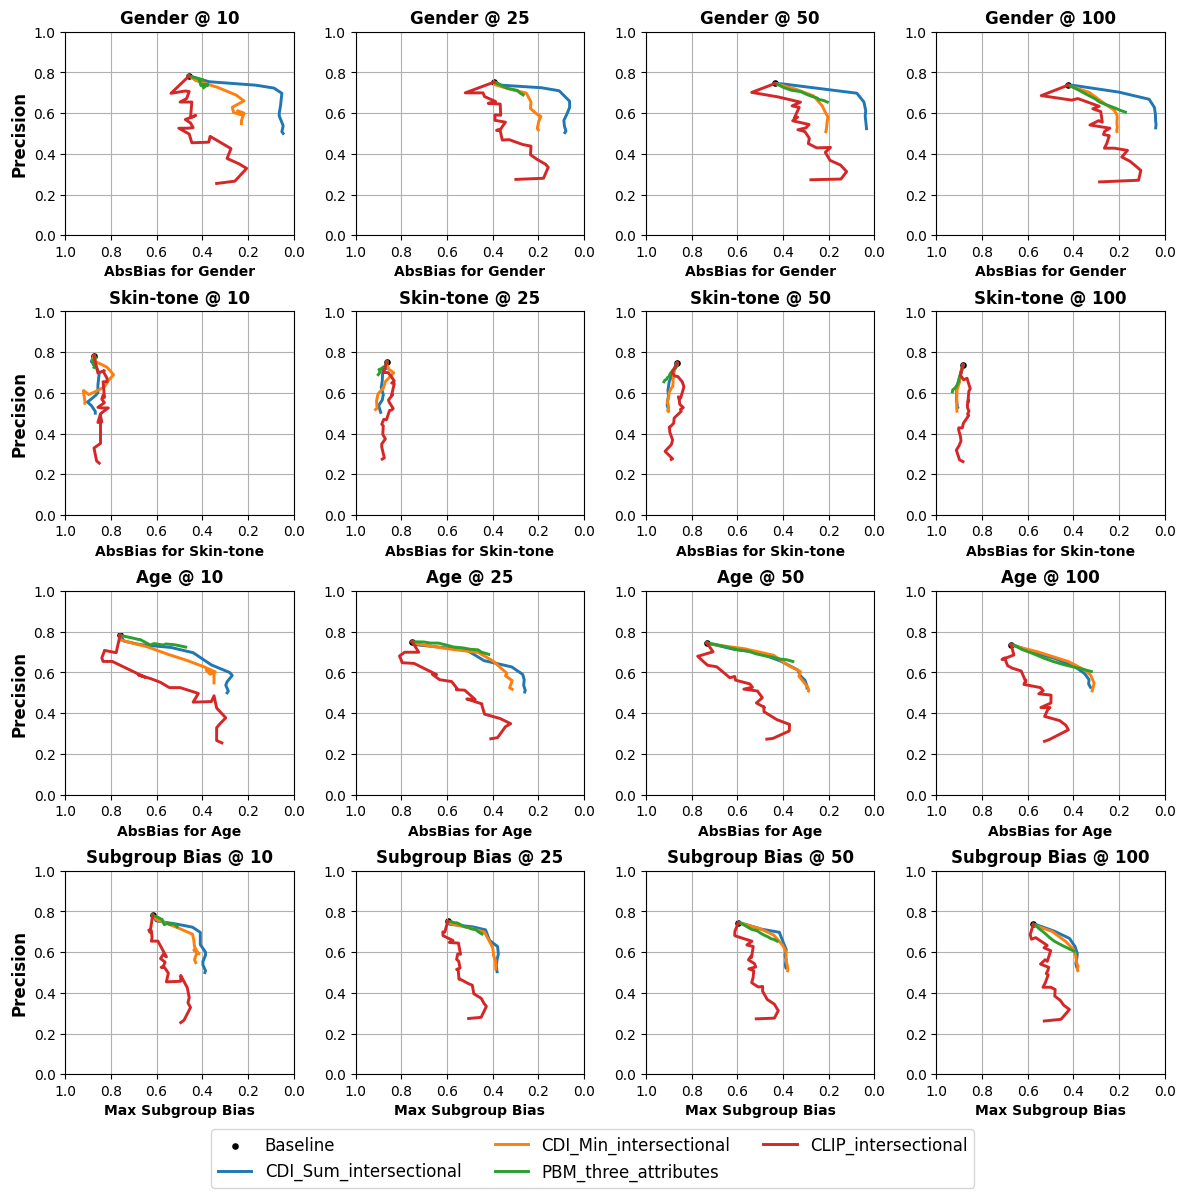

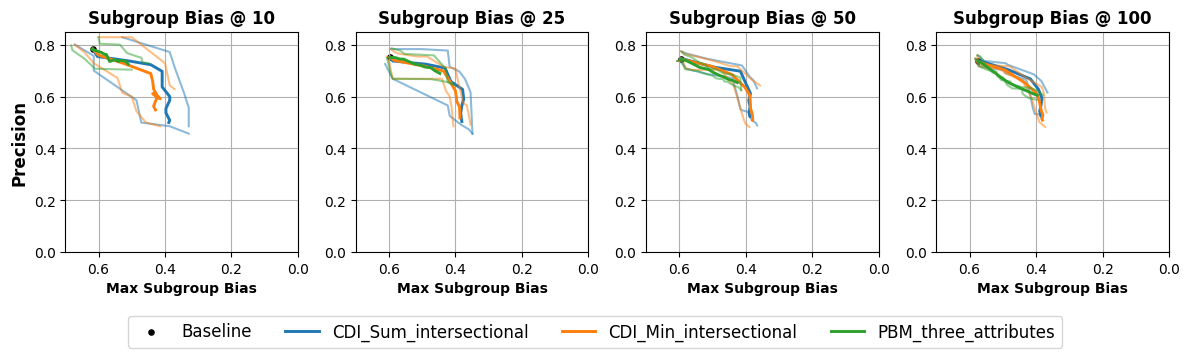

In [100]:
ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Age', 'Subgroup Bias']
metrics = ['Avg_AbsBias_Male', 'Avg_AbsBias_Pale_Skin', 'Avg_AbsBias_Young','Avg_Max_MC_Bias']
core_methods = all_methods
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_xlim(1, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision', weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[i, j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[i, j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for method in core_methods:
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c=c)
            else:
                avg_c = avg_cats(data, "tol")
                #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
                pareto_points = avg_c #avg_c.iloc[pareto_front]
                ax[i, j].plot(pareto_points[metric], pareto_points['Avg_Precision'], label=method, linewidth=2.1)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.subplots_adjust(bottom=0.12)
fig.show()

core_methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_Min_intersectional', 'PBM_three_attributes']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ks = [10, 25, 50, 100]
titles = ['Subgroup Bias']
metrics = ['Avg_Max_MC_Bias']
for i in range(1):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[j].set_title(f'{title} @ {k}', weight='bold')
        ax[j].set_ylim(0, .85)
        ax[j].set_xlim(.7, 0)
        ax[j].grid(True)
        if j == 0:
            ax[j].set_ylabel('Precision',weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for z, method in enumerate(core_methods):
            c = colors[z]
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                ax[j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c = c)
            else:
                ax[j].plot(avg_cats(data, "tol")[metric], avg_cats(data, "tol")['Avg_Precision'], label=method, c=c, linewidth=2.1)
                bc = data.iloc[is_pareto_efficient_simple(data, 'Avg_Max_MC_Bias', 'Avg_Precision')].sort_values('Avg_Max_MC_Bias', ascending=False)
                wc = data.iloc[is_pareto_efficient_simple(data, 'Avg_Max_MC_Bias', 'Avg_Precision', xlowerisbetter=False, ylowerisbetter=True)].sort_values('Avg_Max_MC_Bias', ascending=False)
                ax[j].plot(bc[metric], bc['Avg_Precision'], label='_nolegend_', alpha=.5, c=c)
                ax[j].plot(wc[metric], wc['Avg_Precision'], label='_nolegend_', alpha=.5, c=c)

        handles, labels = ax[j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=4, fontsize='large')
fig.subplots_adjust(bottom=0.34)
fig.show()


In [91]:
df1 = pd.read_pickle('results/giis-3-21.pkl')
df2 = pd.read_pickle('results/giis-3-24-CLIP-euc.pkl')
df3 = pd.read_pickle('results/giis-cdi_features.pkl')
df4 = pd.read_pickle('results/giis-pbm-3-22.pkl')


names_to_drop = df2['name'].unique().tolist() + df3['name'].unique().tolist() + df4['name'].unique().tolist()

df1_dropped = df1[~df1['name'].isin(names_to_drop)]
print(df1_dropped['name'].unique())

giis_df = pd.concat([df1_dropped, df2, df3, df4])
print(giis_df['name'].unique())

pd.to_pickle(giis_df, 'results/giis-complete.pkl')

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Min_gender' 'CDI_Min_intersectional' 'CDI_Random' 'CDI_TrueConcept'
 'DebiasClip']
['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Min_gender' 'CDI_Min_intersectional' 'CDI_Random' 'CDI_TrueConcept'
 'DebiasClip' 'CLIP_gender' 'CLIP_skintone' 'CLIP_intersectional'
 'CLIP_three_attributes' 'CDI_Min_skintone' 'CDI_EucSum_intersectional'
 'CDI_EucMin_intersectional' 'CDI_Features' 'PBM_gender'
 'PBM_intersectional' 'PBM_skintone']


In [96]:
df1 = pd.read_pickle('results/occ2-3-23.pkl')
df2 = pd.read_pickle('results/occ2-3-24-CLIP.pkl')
df3 = pd.read_pickle('results/occ2-3-24-eucmethods.pkl')
df4 = pd.read_pickle('results/occ2-3-24-skintone.pkl')

dfs = [df1, df2, df3, df4]
for df in dfs:
    print(df['name'].unique()) 

names_to_drop = df2['name'].unique().tolist() + df3['name'].unique().tolist() + df4['name'].unique().tolist()

df1_dropped = df1[~df1['name'].isin(names_to_drop)]
print(df1_dropped['name'].unique())

occ2_df = pd.concat([df1_dropped, df2, df3, df4])
print(occ2_df['name'].unique())

pd.to_pickle(occ2_df, 'results/occ2-complete.pkl')

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Sum_3_attr' 'CDI_Sum_4_attr' 'CDI_Min_gender'
 'CDI_Min_intersectional' 'CDI_Min_skintone' 'CDI_Min_3_attr'
 'CDI_Min_4_attr' 'CDI_Random' 'CDI_Features' 'CDI_TrueConcept'
 'PBM_gender' 'PBM_intersectional' 'PBM_skintone' 'PBM_three_attributes'
 'PBM_four_attributes' 'CLIP_gender' 'CLIP_skintone' 'CLIP_intersectional'
 'CLIP_three_attributes' 'DebiasClip']
['CLIP_gender' 'CLIP_skintone' 'CLIP_intersectional'
 'CLIP_three_attributes']
['CDI_EucSum_3_attr' 'CDI_EucSum_intersectional' 'CDI_EucMin_3_attr'
 'CDI_EucMin_intersectional']
['CDI_Min_skintone']
['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Sum_3_attr' 'CDI_Sum_4_attr' 'CDI_Min_gender'
 'CDI_Min_intersectional' 'CDI_Min_3_attr' 'CDI_Min_4_attr' 'CDI_Random'
 'CDI_Features' 'CDI_TrueConcept' 'PBM_gender' 'PBM_intersectional'
 'PBM_skintone' 'PBM_three_attributes' 'PBM_four_attributes' 'DebiasClip']
['Baseline' 'CDI_Sum_g

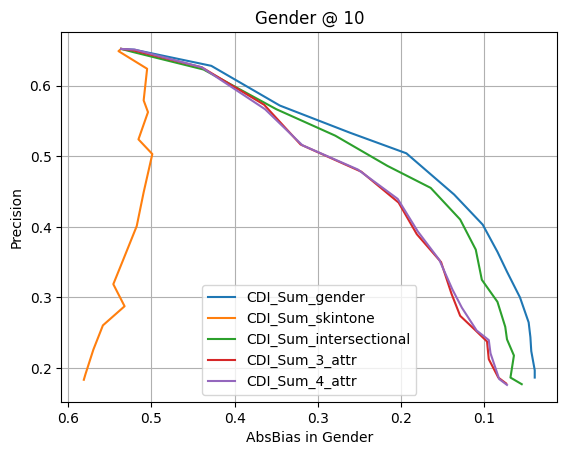

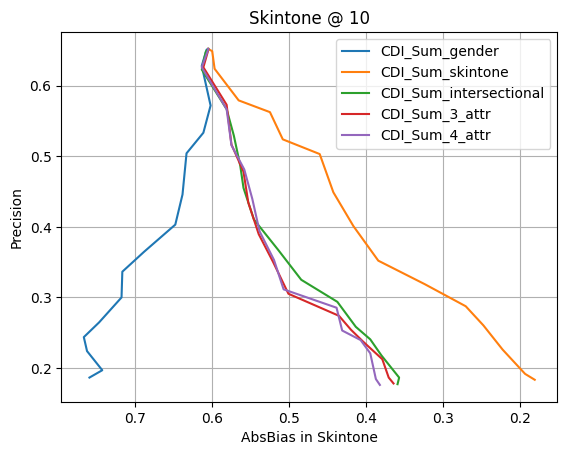

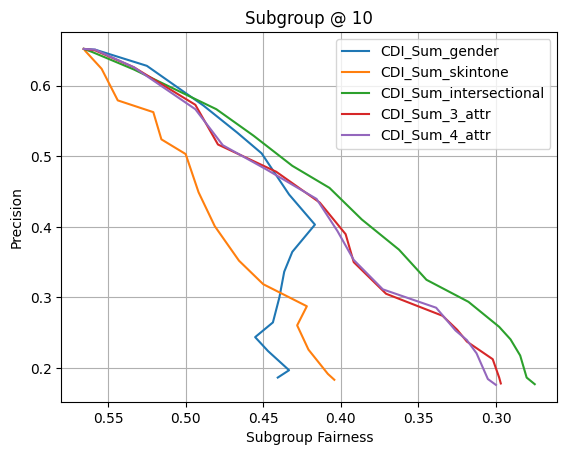

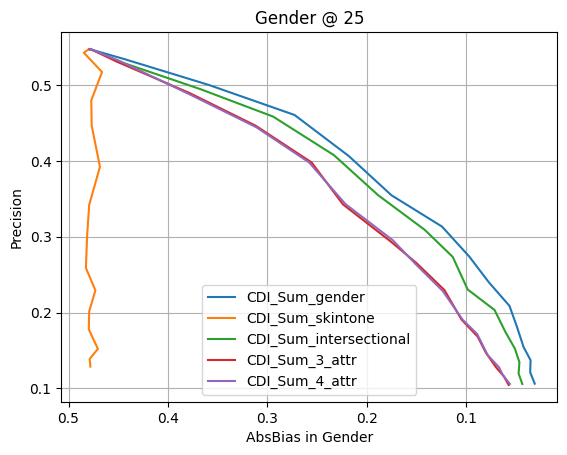

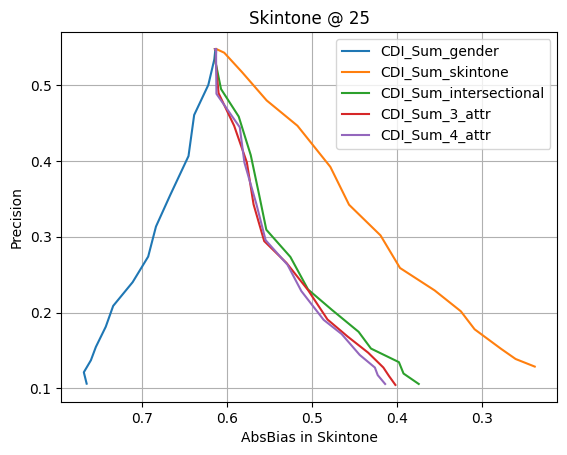

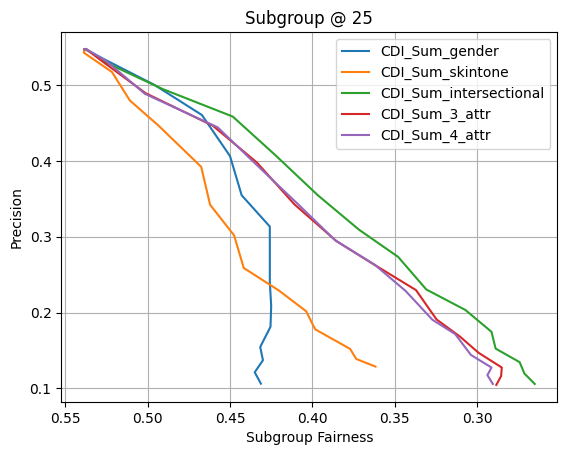

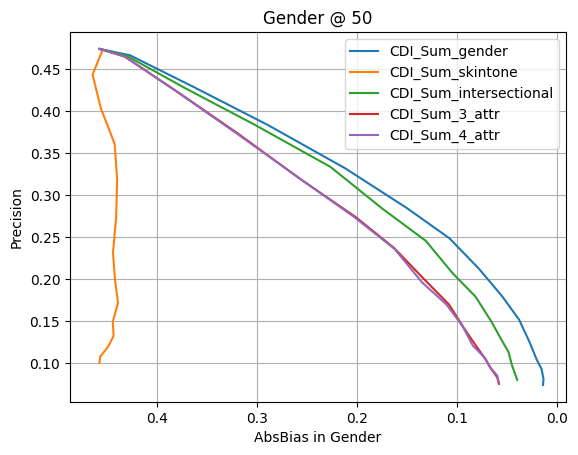

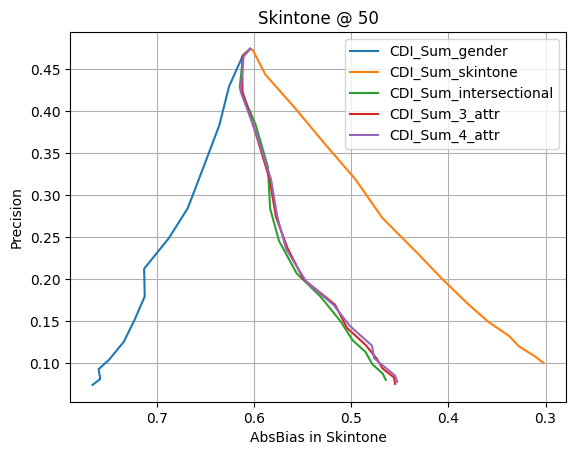

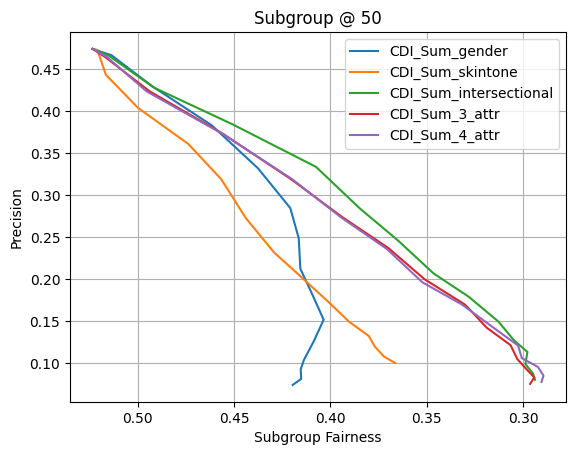

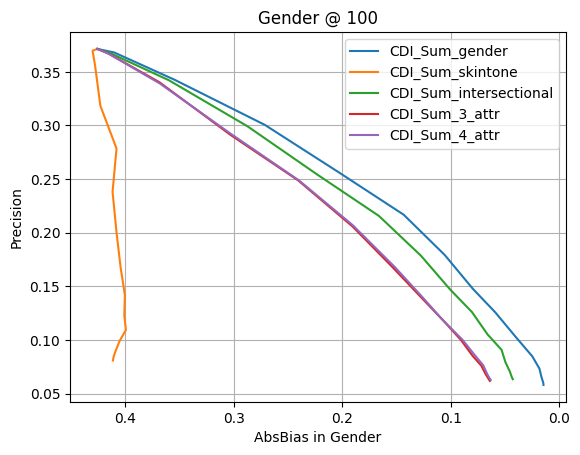

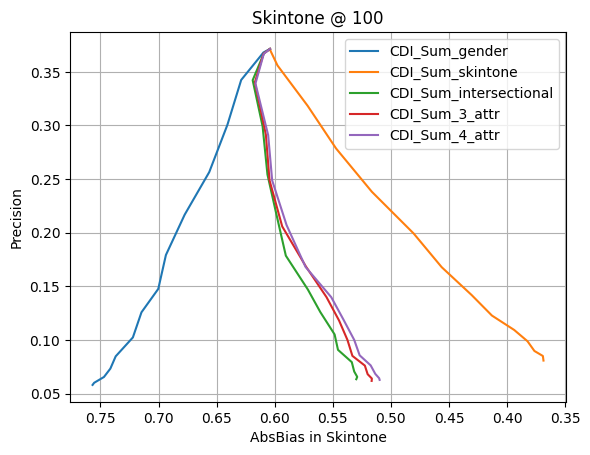

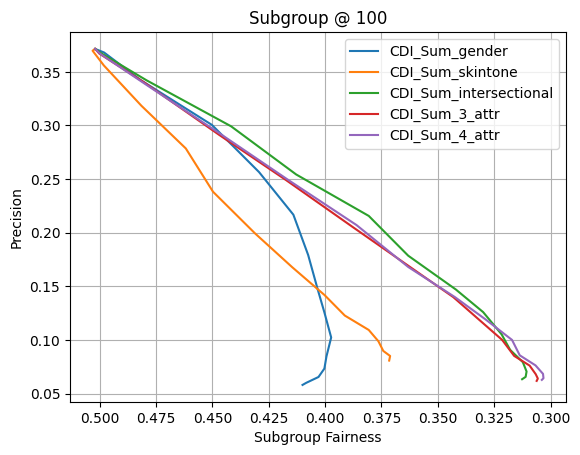

In [25]:
occ2_df = pd.read_pickle('results/occ2-complete.pkl')

methods = ['CDI_Sum_gender', 'CDI_Sum_skintone', 'CDI_Sum_intersectional',
 'CDI_Sum_3_attr', 'CDI_Sum_4_attr']
k = [10, 25, 50, 100]

metrics = ['Avg_AbsBias_gender', 'Avg_AbsBias_skintone', 'Avg_Max_MC_Bias']


for k in k:
    plot_across_tol(occ2_df, k, methods, metrics[0], 'Avg_Precision', xlabel='AbsBias in Gender', ylabel='Precision', title=f'Gender @ {k}', reverse_x=True)
    plot_across_tol(occ2_df, k, methods, metrics[1], 'Avg_Precision', xlabel='AbsBias in Skintone', ylabel='Precision', title=f'Skintone @ {k}', reverse_x=True)
    plot_across_tol(occ2_df, k, methods, metrics[2], 'Avg_Precision', xlabel='Subgroup Fairness', ylabel='Precision', title=f'Subgroup @ {k}', reverse_x=True)

    

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Min_gender' 'CDI_Min_intersectional' 'CDI_Random' 'CDI_TrueConcept'
 'DebiasClip' 'CLIP_gender' 'CLIP_skintone' 'CLIP_intersectional'
 'CLIP_three_attributes' 'CDI_Min_skintone' 'CDI_EucSum_intersectional'
 'CDI_EucMin_intersectional' 'CDI_Features' 'PBM_gender'
 'PBM_intersectional' 'PBM_skintone']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1081808719.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


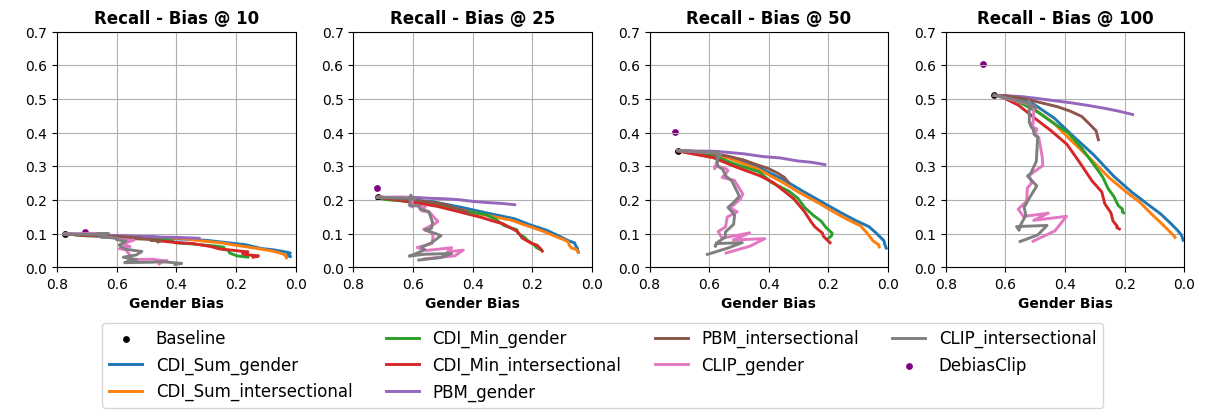

In [111]:
giis = pd.read_pickle('results/giis-complete.pkl')

print(giis['name'].unique())
methods = ['Baseline', 'CDI_Sum_gender', 'CDI_Sum_intersectional', 'CDI_Min_gender', 'CDI_Min_intersectional', 'PBM_gender',
 'PBM_intersectional','CLIP_gender', 'CLIP_intersectional', 'DebiasClip']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Recall - Bias @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if j == 0:
        ax[i].set_ylabel('Recall', weight='bold', fontsize=12)
    ax[i].set_xlabel('Gender Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = giis[(giis['name'] == method) & (giis['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_AbsBias_gender']), np.mean(data['Avg_Recall']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_AbsBias_gender'], pareto_points['Avg_Recall'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=4, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.42)
fig.show()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\39228186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\39228186.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


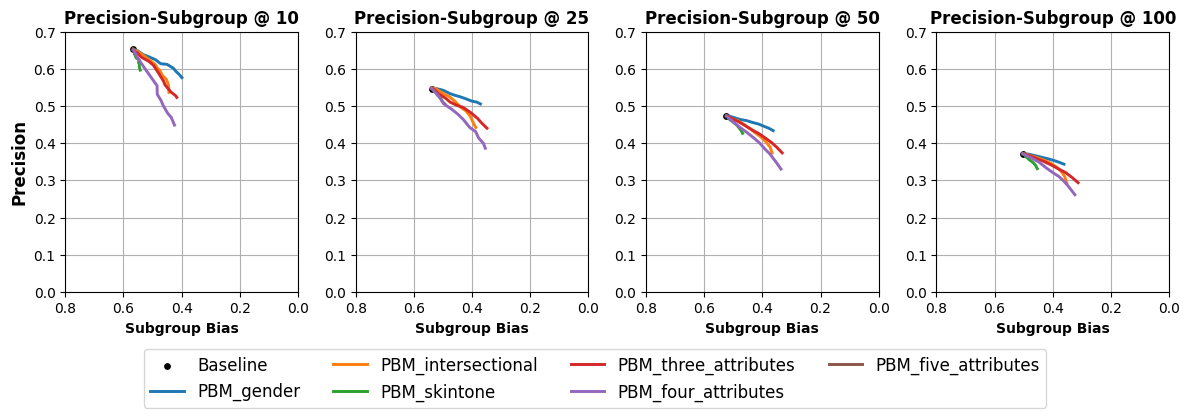

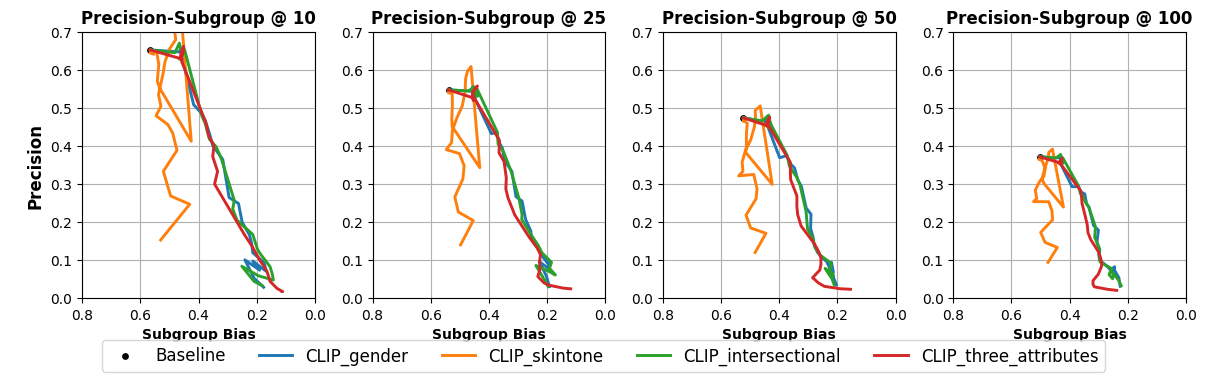

In [233]:
occ2 = pd.read_pickle('results/occ2-complete.pkl')
#occ2_5 = pd.read_pickle('results/occ2-pbm-five-concepts.pkl')
#occ2 = pd.concat([occ2, occ2_5])

methods = ['Baseline', 'PBM_gender', 'PBM_intersectional',
 'PBM_skintone', 'PBM_three_attributes', 'PBM_four_attributes', 'PBM_five_attributes']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision-Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2[(occ2['name'] == method) & (occ2['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=4, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.35)
fig.show()

occ2 = pd.read_pickle('results/occ2-complete.pkl')

methods = ['Baseline', 'CLIP_gender', 'CLIP_skintone', 'CLIP_intersectional', 'CLIP_three_attributes']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.2))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision-Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2[(occ2['name'] == method) & (occ2['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = data
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=5, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.25)
fig.show()

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_gender_skintone' 'CDI_Sum_skintone'
 'CDI_Sum_age' 'CDI_Sum_intersectional' 'CDI_Sum_4_attr' 'CDI_Min_gender'
 'CDI_Min_gender_skintone' 'CDI_Min_skintone' 'CDI_Min_age'
 'CDI_Min_intersectional' 'CDI_Min_4_attr' 'CDI_Features'
 'CDI_TrueConcept' 'PBM_gender' 'PBM_intersectional' 'PBM_skintone'
 'PBM_three_attributes' 'PBM_four_attributes' 'CLIP_gender'
 'CLIP_skintone' 'CLIP_age' 'CLIP_gender_skintone' 'CLIP_intersectional'
 'CLIP_add_concept' 'DebiasClip']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\4025686551.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


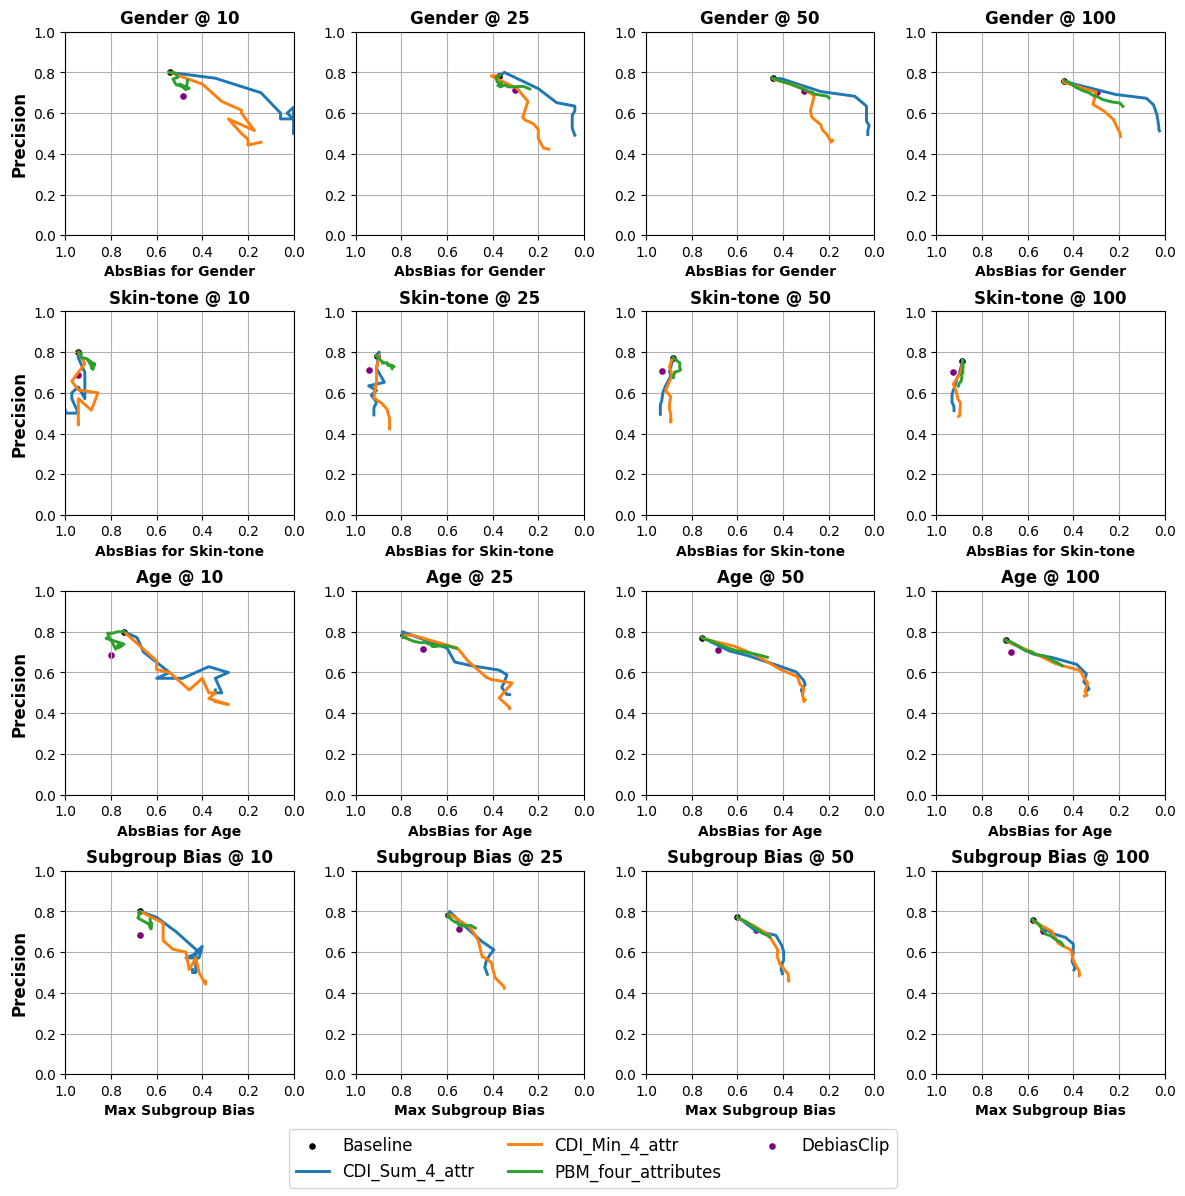

In [191]:
celeba_res = pd.read_pickle('results/celeba-3-24.pkl')

print(celeba_res['name'].unique())

ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Age', 'Subgroup Bias']
metrics = ['Avg_AbsBias_Male', 'Avg_AbsBias_Pale_Skin', 'Avg_AbsBias_Young','Avg_Max_MC_Bias']
core_methods = ['Baseline', 'CDI_Sum_4_attr', 'CDI_Min_4_attr', 'PBM_four_attributes', 'DebiasClip']
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_xlim(1, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision', weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[i, j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[i, j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for method in core_methods:
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c=c)
            else:
                avg_c = data
                #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
                pareto_points = avg_c #avg_c.iloc[pareto_front]
                ax[i, j].plot(pareto_points[metric], pareto_points['Avg_Precision'], label=method, linewidth=2.1)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.subplots_adjust(bottom=0.12)
fig.show()



C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\916655082.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


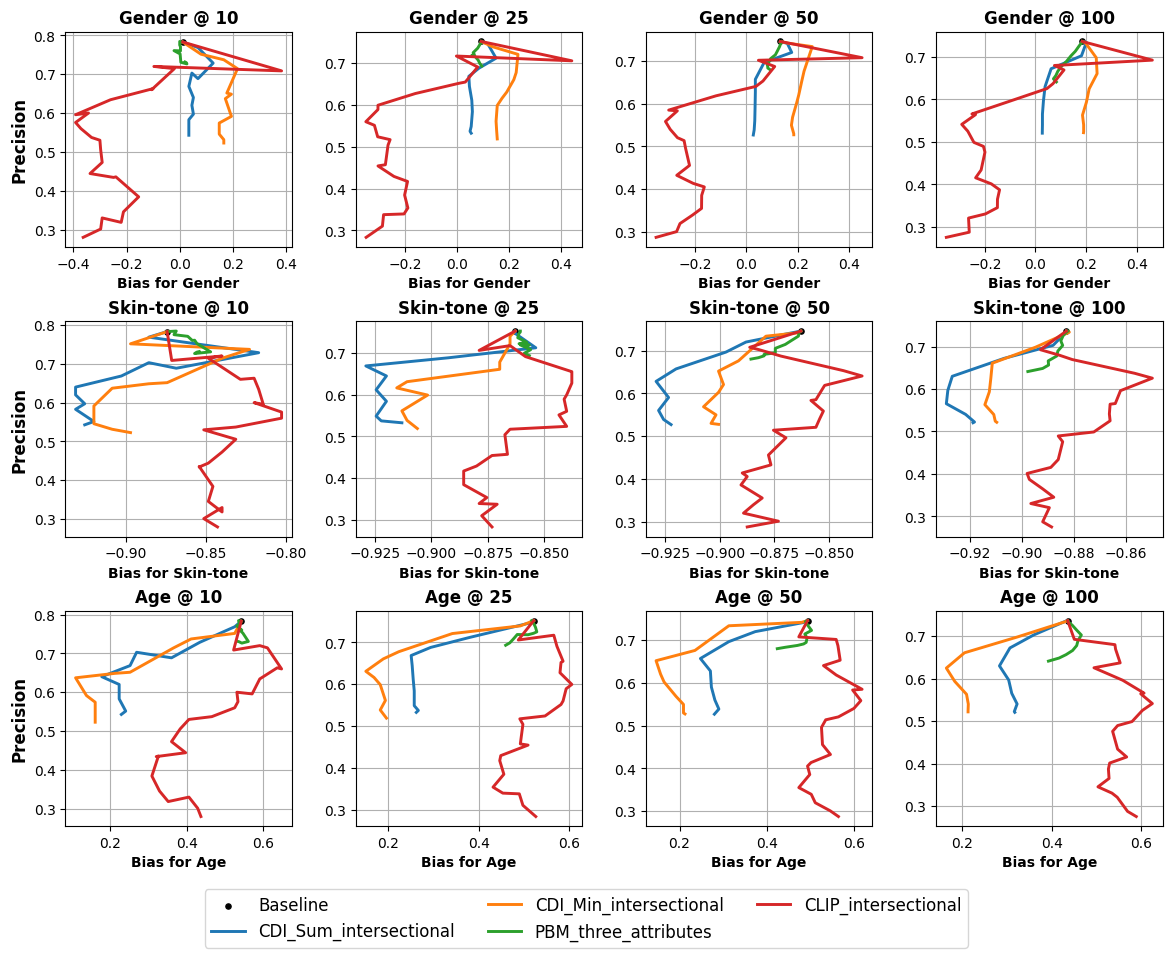

In [114]:
celeba_res = pd.read_pickle('results/celeba-validation.pkl')
ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Age']
metrics = ['Avg_Bias_Male', 'Avg_Bias_Pale_Skin', 'Avg_Bias_Young']
core_methods = all_methods
fig, ax = plt.subplots(3, 4, figsize=(10, 8))

for i in range(3):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        #ax[i, j].set_ylim(0, 1)
        #ax[i, j].set_xlim(1, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision', weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[i, j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[i, j].set_xlabel(f'Bias for {title}', weight='bold')
        for method in core_methods:
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c=c)
            else:
                avg_c = avg_cats(data, "tol")
                #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
                pareto_points = avg_c #avg_c.iloc[pareto_front]
                ax[i, j].plot(pareto_points[metric], pareto_points['Avg_Precision'], label=method, linewidth=2.1)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.subplots_adjust(bottom=0.16)
fig.show()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1072075700.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


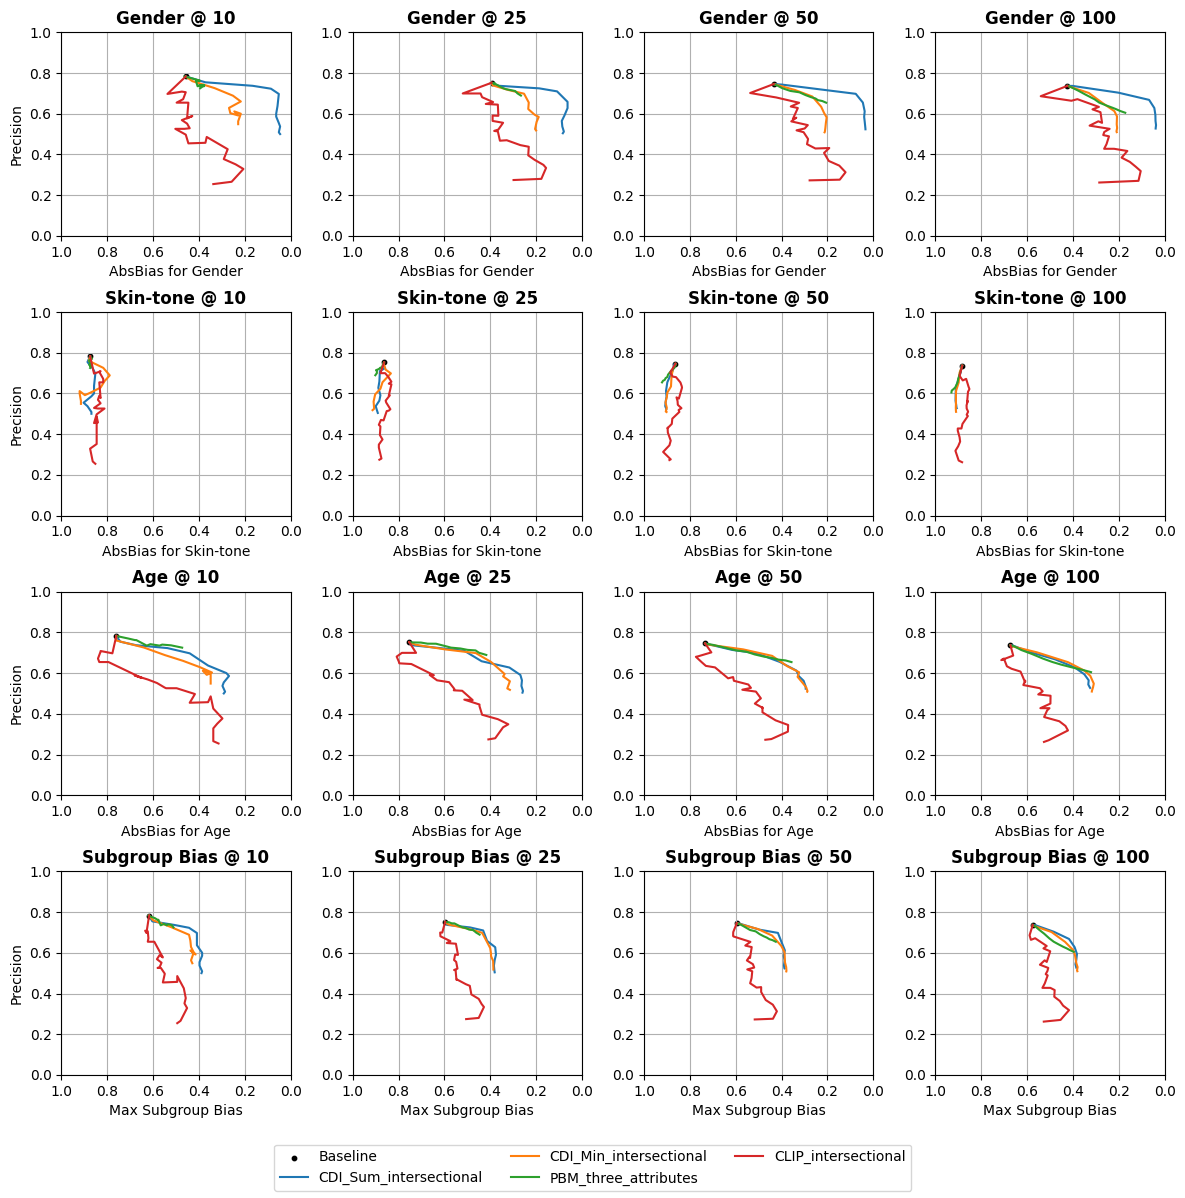

In [79]:
celeba_res = pd.read_pickle('results/celeba-validation-white-nonwhite.pkl')

ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Age', 'Subgroup Bias']
metrics = ['Avg_AbsBias_Male', 'Avg_AbsBias_Pale_Skin', 'Avg_AbsBias_Young','Avg_Max_MC_Bias']
core_methods = all_methods
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_xlim(1, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision')
        if title == 'Subgroup Bias':
            ax[i, j].set_xlabel('Max Subgroup Bias')
        else:
            ax[i, j].set_xlabel(f'AbsBias for {title}')
        for method in core_methods:
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=10, c=c)
            else:
                avg_c = avg_cats(data, "tol")
                #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
                pareto_points = avg_c #avg_c.iloc[pareto_front]
                ax[i, j].plot(pareto_points[metric], pareto_points['Avg_Precision'], label=method)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3)
fig.subplots_adjust(bottom=0.12)
fig.show()

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_intersectional' 'CDI_Sum_skintone'
 'CDI_Min_gender' 'CDI_Min_intersectional' 'CDI_Random' 'CDI_TrueConcept'
 'DebiasClip' 'CLIP_gender' 'CLIP_skintone' 'CLIP_intersectional'
 'CLIP_three_attributes' 'CDI_Min_skintone' 'CDI_EucSum_intersectional'
 'CDI_EucMin_intersectional' 'CDI_Features' 'PBM_gender'
 'PBM_intersectional' 'PBM_skintone']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\2112274546.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


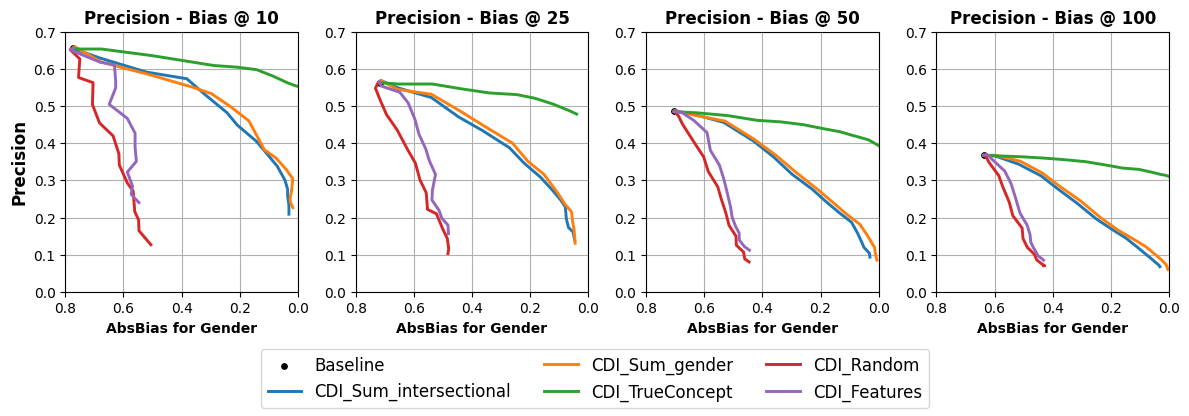

In [192]:
giis = pd.read_pickle('results/giis-complete.pkl')

print(giis['name'].unique())
methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_Sum_gender', 'CDI_TrueConcept', 'CDI_Random', 'CDI_Features']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision - Bias @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('AbsBias for Gender', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = giis[(giis['name'] == method) & (giis['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_AbsBias_gender']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_AbsBias_gender'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.35)
fig.show()

['Baseline' 'CDI_Sum_gender' 'CDI_Sum_gender_skintone' 'CDI_Sum_skintone'
 'CDI_Sum_age' 'CDI_Sum_intersectional' 'CDI_Sum_4_attr' 'CDI_Min_gender'
 'CDI_Min_gender_skintone' 'CDI_Min_skintone' 'CDI_Min_age'
 'CDI_Min_intersectional' 'CDI_Min_4_attr' 'CDI_Features'
 'CDI_TrueConcept' 'PBM_gender' 'PBM_intersectional' 'PBM_skintone'
 'PBM_three_attributes' 'PBM_four_attributes' 'CLIP_gender'
 'CLIP_skintone' 'CLIP_age' 'CLIP_gender_skintone' 'CLIP_intersectional'
 'CLIP_add_concept' 'DebiasClip' 'CDI_Random']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\3601774445.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


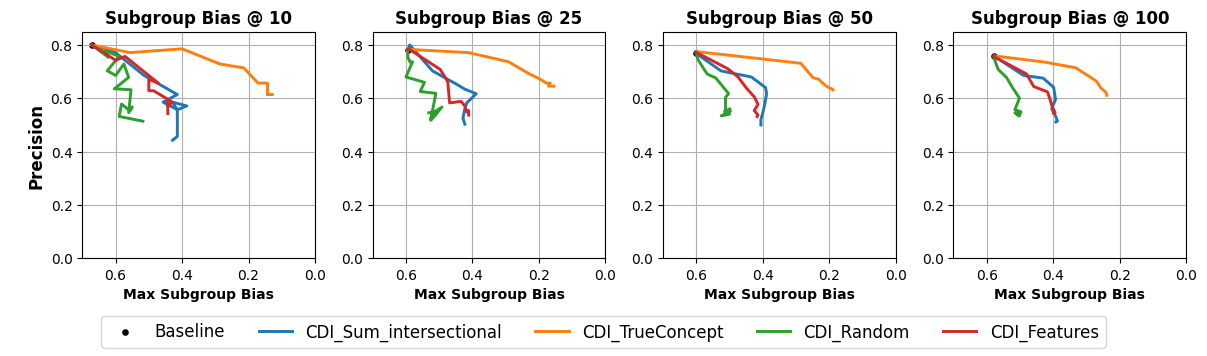

In [148]:
celeba_res = pd.read_pickle('results/celeba-3-24.pkl')
random = pd.read_pickle('results/celeba-random.pkl')
celeba_res = pd.concat([celeba_res, random])
print(celeba_res['name'].unique())
core_methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_TrueConcept', 'CDI_Random', 'CDI_Features']

fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ks = [10, 25, 50, 100]
titles = ['Subgroup Bias']
metrics = ['Avg_Max_MC_Bias']
for i in range(1):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[j].set_title(f'{title} @ {k}', weight='bold')
        ax[j].set_ylim(0, .85)
        ax[j].set_xlim(.7, 0)
        ax[j].grid(True)
        if j == 0:
            ax[j].set_ylabel('Precision',weight='bold', fontsize=12)
        if title == 'Subgroup Bias':
            ax[j].set_xlabel('Max Subgroup Bias', weight='bold')
        else:
            ax[j].set_xlabel(f'AbsBias for {title}', weight='bold')
        for z, method in enumerate(core_methods):
            c = colors[z]
            data = celeba_res[(celeba_res['name'] == method) & (celeba_res['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                ax[j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c = c)
            else:
                ax[j].plot(avg_cats(data, "tol")[metric], avg_cats(data, "tol")['Avg_Precision'], label=method, c=c, linewidth=2.1)

        handles, labels = ax[j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=5, fontsize='large')
fig.subplots_adjust(bottom=0.32)
fig.show()


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\2787505549.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


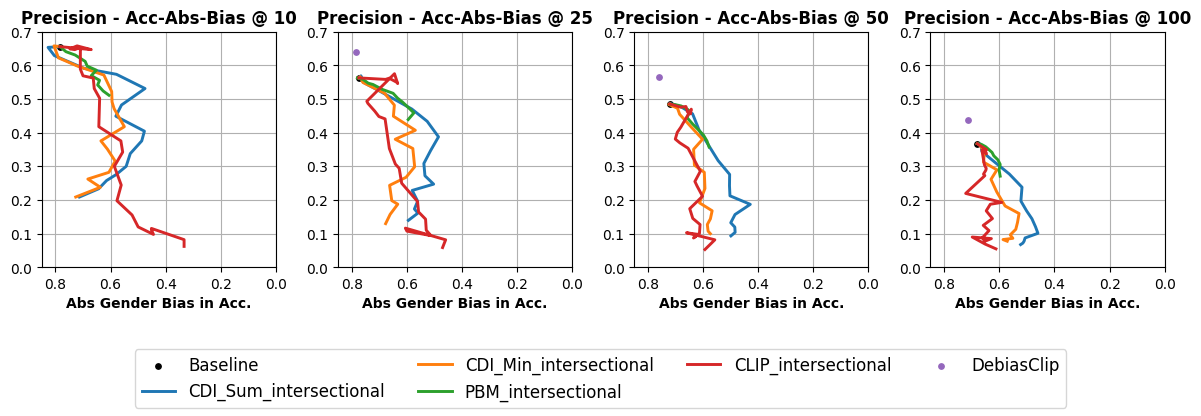

In [194]:
giis = pd.read_pickle('results/giis-complete.pkl')
#print(giis.head())
#print(giis['name'].unique())
methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_Min_intersectional', 
 'PBM_intersectional', 'CLIP_intersectional', 'DebiasClip']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision - Acc-Abs-Bias @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.85, 0)
    ax[i].grid(True)
    if j == 0:
        ax[i].set_ylabel('Recall', weight='bold', fontsize=12)
    ax[i].set_xlabel('Abs Gender Bias in Acc.', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = giis[(giis['name'] == method) & (giis['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_AbsBias_for_Accurate_gender']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_AbsBias_for_Accurate_gender'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=4, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.42)
fig.show()

['Baseline' 'CDI_Sum_intersectional' 'CDI_Min_intersectional'
 'PBM_intersectional' 'CLIP_intersectional' 'DebiasClip']


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\3419981241.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


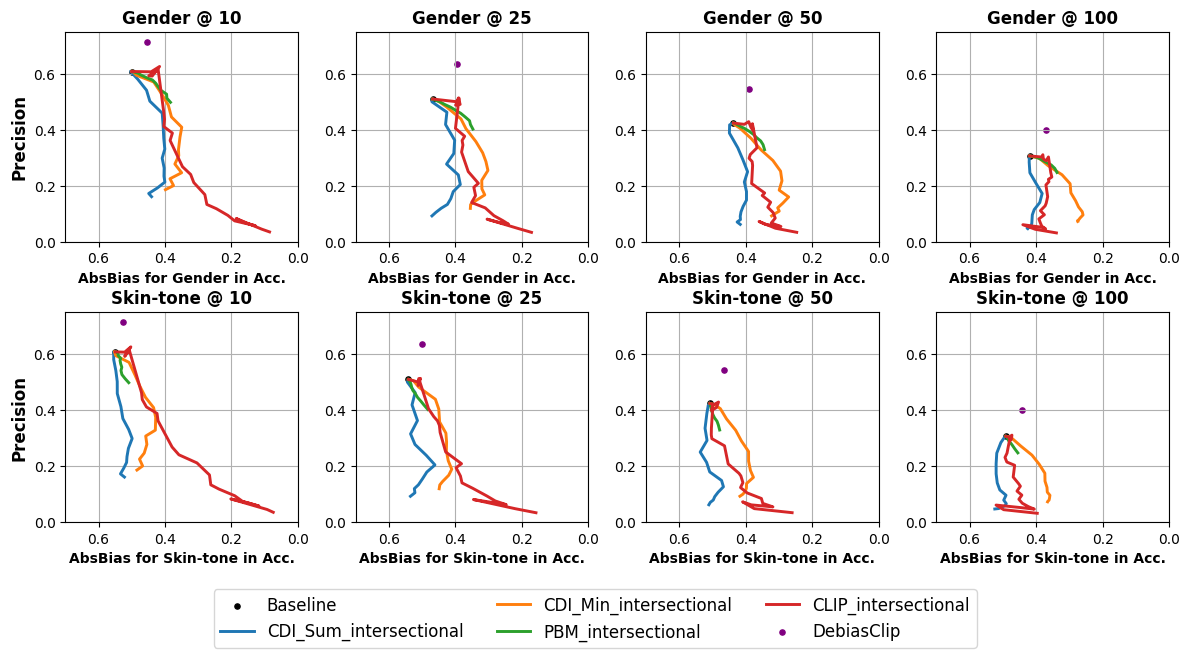

In [142]:
validation = pd.read_pickle('results/occ2-3-29-validation.pkl')

methods = validation['name'].unique()
print(methods)

ks = [10, 25, 50, 100]
titles = ['Gender', 'Skin-tone', 'Subgroup Bias']
metrics = ['Avg_AbsBias_for_Accurate_gender', 'Avg_AbsBias_for_Accurate_skintone']

fig, ax = plt.subplots(2, 4, figsize=(10, 5.5))

for i in range(2):
    title = titles[i]
    metric = metrics[i]
    for j in range(4):
        k = ks[j]
        ax[i, j].set_title(f'{title} @ {k}', weight='bold')
        ax[i, j].set_ylim(0, .75)
        ax[i, j].set_xlim(.7, 0)
        ax[i, j].grid(True)
        if j == 0:
            ax[i, j].set_ylabel('Precision', weight='bold', fontsize=12)
        ax[i, j].set_xlabel(f'AbsBias for {title} in Acc.', weight='bold')
        for method in methods:
            data = validation[(validation['name'] == method) & (validation['k'] == k)]
            if method in ['Baseline', 'DebiasClip']:
                if method == 'Baseline':
                    c = 'black'
                if method == 'DebiasClip':
                    c = 'purple'
                ax[i, j].scatter(np.mean(data[metric]), np.mean(data['Avg_Precision']), label=method, s=14, c = c)
            else:
                ax[i, j].plot(avg_cats(data, "tol")[metric], avg_cats(data, "tol")['Avg_Precision'], label=method,  linewidth=2.1)

        handles, labels = ax[i, j].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.subplots_adjust(bottom=0.24)
fig.show()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1692040062.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\1692040062.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


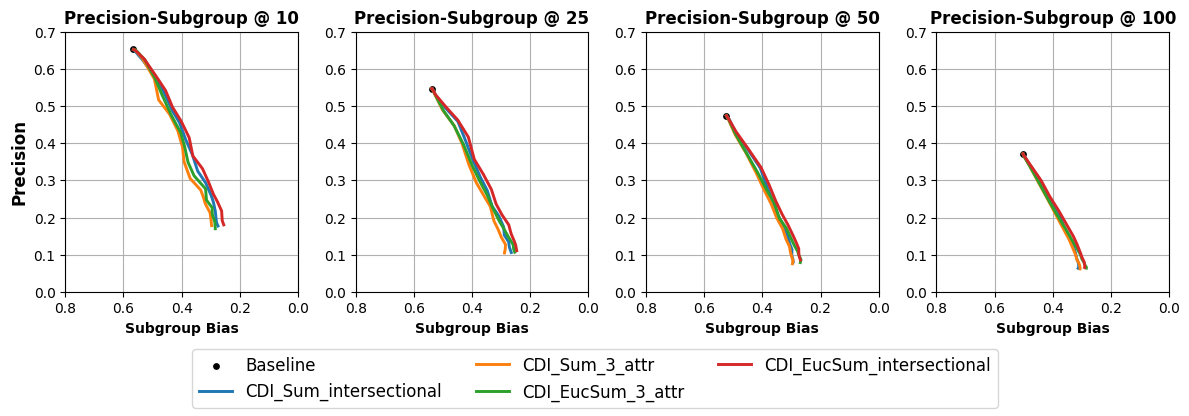

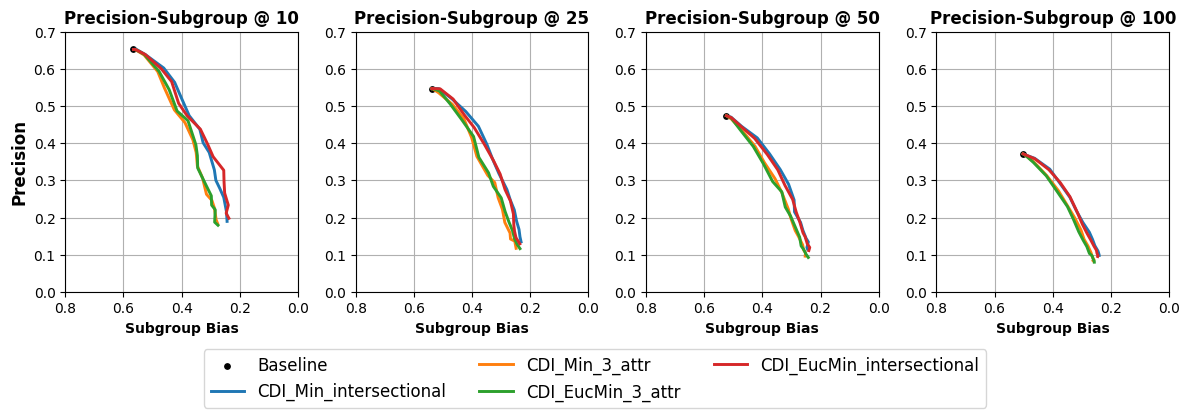

In [229]:
occ2 = pd.read_pickle('results/occ2-complete.pkl')

methods = ['Baseline', 'CDI_Sum_intersectional', 'CDI_Sum_3_attr', 'CDI_EucSum_3_attr', 'CDI_EucSum_intersectional']
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision-Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2[(occ2['name'] == method) & (occ2['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.35)
fig.show()

methods = ['Baseline', 'CDI_Min_intersectional', 'CDI_Min_3_attr', 'CDI_EucMin_3_attr', 'CDI_EucMin_intersectional']

colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(10, 3.5))
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision-Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2[(occ2['name'] == method) & (occ2['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c=c)
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=3, fontsize='large')
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.35)
fig.show()


In [156]:
giis_data = pd.read_csv('datasets/gender_in_image_search/gender_labelled_images.csv')
occupations_data = pd.read_csv('datasets/occupations_2/occupations_labels.csv')
celeba_data = pd.read_csv('datasets/celeba/list_attr_celeba.csv')
celeba_primary_data = pd.read_csv('datasets/celeba/alg_testing.csv')

print(f"GIIS gender: {giis_data['image_gender'].value_counts() / len(giis_data)}")
print(f"Occupations gender: {occupations_data['gender'].value_counts()/ len(occupations_data)}")
print(f"Occupations skintone: {occupations_data['skintone'].value_counts() / len(occupations_data)}")
print(f"CelebA (entire) gender: {celeba_data['Male'].value_counts() / len(celeba_data)}")
print(f"CelebA (entire) skintone: {celeba_data['Pale_Skin'].value_counts() / len(celeba_data)}")
print(f"CelebA (entire) age: {celeba_data['Young'].value_counts() / len(celeba_data)}")
print(f"CelebA (primary) gender: {celeba_primary_data['Male'].value_counts() / len(celeba_primary_data)}")
print(f"CelebA (primary) skintone: {celeba_primary_data['Pale_Skin'].value_counts() / len(celeba_primary_data)}")
print(f"CelebA (primary) age: {celeba_primary_data['Young'].value_counts() / len(celeba_primary_data)}")

GIIS gender: man      0.610668
woman    0.389332
Name: image_gender, dtype: float64
Occupations gender: Male      0.354271
Female    0.252500
Name: gender, dtype: float64
Occupations skintone: light    0.521667
dark     0.103333
Name: skintone, dtype: float64
CelebA (entire) gender: -1    0.583246
 1    0.416754
Name: Male, dtype: float64
CelebA (entire) skintone: -1    0.957053
 1    0.042947
Name: Pale_Skin, dtype: float64
CelebA (entire) age:  1    0.773617
-1    0.226383
Name: Young, dtype: float64
CelebA (primary) gender: -1    0.580933
 1    0.419067
Name: Male, dtype: float64
CelebA (primary) skintone: -1    0.9566
 1    0.0434
Name: Pale_Skin, dtype: float64
CelebA (primary) age:  1    0.781467
-1    0.218533
Name: Young, dtype: float64


In [189]:
gs_df = pd.read_pickle('results/giis-complete.pkl')
occ2_df = pd.read_pickle('results/occ2-3-29-validation.pkl')
celeba_df = pd.read_pickle('results/celeba-validation.pkl')

cols = ['name', 'k', 'tol', 'Avg_Precision', 'Avg_AbsBias_gender', 'Avg_Bias_gender']

key_models = ['CDI_Sum_intersectional', 'CDI_Min_intersectional']
tols = [.02]
gs_df1 = gs_df[gs_df['k'].isin([25])]
gs_df1 = gs_df1[gs_df1['name'].isin(key_models)]
gs_df1 = gs_df1[gs_df1['tol'].isin(tols)][cols]


gs_df2 = gs_df[gs_df['k'].isin([25])]
gs_df2 = gs_df2[gs_df2['name'] == 'Baseline'][cols]


gs_df3 = gs_df[gs_df['k'].isin([25])]
gs_df3 = gs_df3[gs_df3['name'].isin(['DebiasClip', 'PBM_intersectional'])][cols]
gs_df3 = gs_df3[gs_df3['tol'] == 0]


gs_df4 = gs_df[gs_df['k'].isin([25])]
gs_df4 = gs_df4[gs_df4['name'] == 'CLIP_intersectional'][cols]
gs_df4 = gs_df4[gs_df4['tol'] == 200]
print(gs_df4)

gs = pd.concat([gs_df2, gs_df1, gs_df3, gs_df4])
print(gs)
gs.to_csv('results/giis-table.csv')

                    name     k    tol  Avg_Precision  Avg_AbsBias_gender  \
226  CLIP_intersectional  25.0  200.0       0.440889            0.546667   

     Avg_Bias_gender  
226        -0.363556  
                       name     k     tol  Avg_Precision  Avg_AbsBias_gender  \
1                  Baseline  25.0     NaN       0.562667            0.717333   
88   CDI_Sum_intersectional  25.0    0.02       0.470222            0.445333   
280  CDI_Min_intersectional  25.0    0.02       0.481778            0.516444   
664              DebiasClip  25.0    0.00       0.639111            0.720889   
65       PBM_intersectional  25.0    0.00       0.439111            0.410222   
226     CLIP_intersectional  25.0  200.00       0.440889            0.546667   

     Avg_Bias_gender  
1          -0.328000  
88         -0.315556  
280        -0.354667  
664        -0.265778  
65          0.140444  
226        -0.363556  


['Baseline' 'CDI_Min_3_attr' 'CDI_Min_6_attr' 'CDI_Min_8_attr'
 'CDI_Sum_3_attr' 'CDI_Sum_6_attr' 'CDI_Sum_8_attr' 'CDI_EucMin_3_attr'
 'CDI_EucMin_6_attr' 'CDI_EucMin_8_attr' 'CDI_EucSum_3_attr'
 'CDI_EucSum_6_attr' 'CDI_EucSum_8_attr' 'CDI_Min_overconcept'
 'CDI_Sum_overconcept' 'CDI_EucMin_overconcept' 'CDI_EucSum_overconcept']
[25 50]


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\2210542075.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


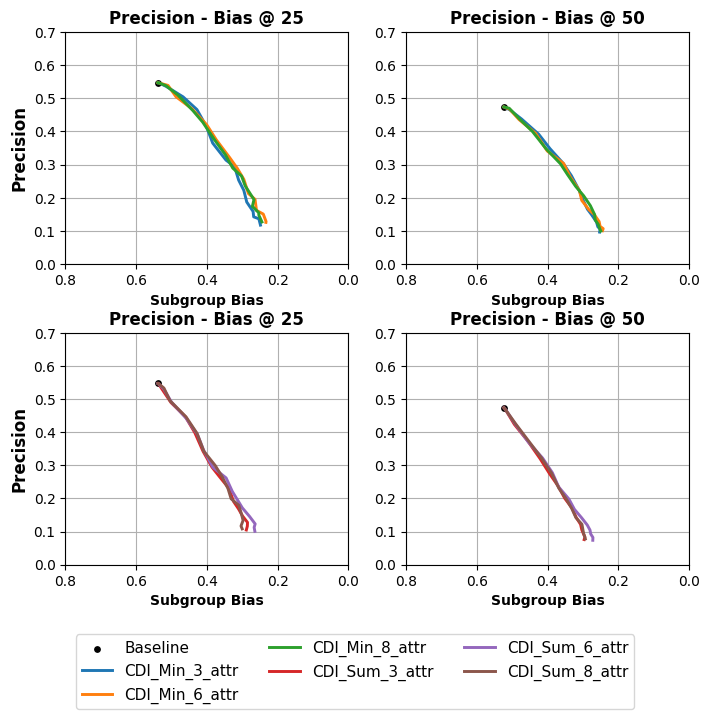

In [215]:
occ2_c = pd.read_pickle('results/occ2-extra_concepts.pkl')

print(occ2_c['name'].unique())
print(occ2_c['k'].unique())

colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple']

ks = [25, 50]

methods = ['Baseline', 'CDI_Min_3_attr', 'CDI_Min_6_attr', 'CDI_Min_8_attr']

fig, ax = plt.subplots(2, 2, figsize=(6, 6.))
q = 0
c = 0
for i, k in enumerate(ks):
    ax[q, i].set_title(f'Precision - Bias @ {k}', weight='bold')
    ax[q, i].set_ylim(0, .7)
    ax[q, i].set_xlim(.8, 0)
    ax[q, i].grid(True)
    if i == 0:
        ax[q, i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[q, i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2_c[(occ2_c['name'] == method) & (occ2_c['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[q, i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c='black')
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[q, i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles1, labels1 = ax[q, i].get_legend_handles_labels()

methods = ['Baseline', 'CDI_Sum_3_attr', 'CDI_Sum_6_attr', 'CDI_Sum_8_attr']
q = 1
for i, k in enumerate(ks):
    ax[q, i].set_title(f'Precision - Bias @ {k}', weight='bold')
    ax[q, i].set_ylim(0, .7)
    ax[q, i].set_xlim(.8, 0)
    ax[q, i].grid(True)
    if i == 0:
        ax[q, i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[q, i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[3 + j]
        data = occ2_c[(occ2_c['name'] == method) & (occ2_c['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[q, i].scatter(np.mean(data['Avg_Max_MC_Bias']), np.mean(data['Avg_Precision']), label=method, s=15, c='black')
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[q, i].plot(pareto_points['Avg_Max_MC_Bias'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles2, labels2 = ax[q, i].get_legend_handles_labels()

handles1 += handles2[1:]
labels1 += labels2[1:]

fig.legend(handles1, labels1, loc='lower center', ncols=3, fontsize=11)
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.25)
fig.show()


['Baseline' 'CDI_Min_3_attr' 'CDI_Min_6_attr' 'CDI_Min_8_attr'
 'CDI_Sum_3_attr' 'CDI_Sum_6_attr' 'CDI_Sum_8_attr' 'CDI_EucMin_3_attr'
 'CDI_EucMin_6_attr' 'CDI_EucMin_8_attr' 'CDI_EucSum_3_attr'
 'CDI_EucSum_6_attr' 'CDI_EucSum_8_attr' 'CDI_Min_overconcept'
 'CDI_Sum_overconcept' 'CDI_EucMin_overconcept' 'CDI_EucSum_overconcept']
[25 50]


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\3797163290.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


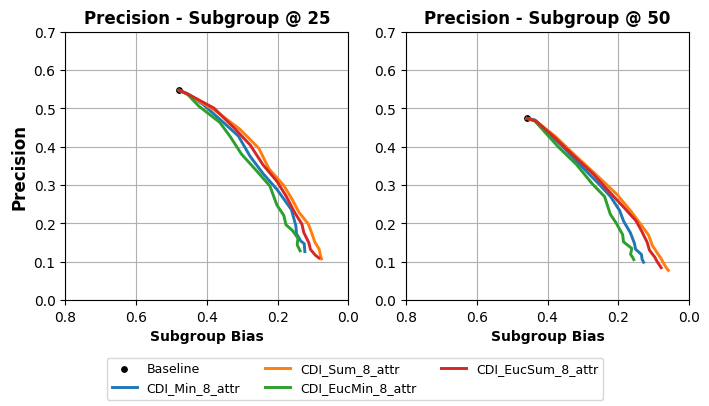

In [230]:
occ2_c = pd.read_pickle('results/occ2-extra_concepts.pkl')

print(occ2_c['name'].unique())
print(occ2_c['k'].unique())

colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple', 'red', 'orange', 'green', 'blue', 'indigo', 'violet']

ks = [25, 50]

methods = ['Baseline', 'CDI_Min_8_attr', 'CDI_Sum_8_attr', 'CDI_EucMin_8_attr', 'CDI_EucSum_8_attr']

fig, ax = plt.subplots(1, 2, figsize=(6, 3.4))
q = 0
c = 0
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision - Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('Subgroup Bias', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2_c[(occ2_c['name'] == method) & (occ2_c['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_AbsBias_gender']), np.mean(data['Avg_Precision']), label=method, s=15, c='black')
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_AbsBias_gender'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles1, labels1 = ax[i].get_legend_handles_labels()


fig.legend(handles1, labels1, loc='lower center', ncols=3, fontsize=9)
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.3)
fig.show()

['Baseline' 'CDI_Min_3_attr' 'CDI_Min_6_attr' 'CDI_Min_8_attr'
 'CDI_Sum_3_attr' 'CDI_Sum_6_attr' 'CDI_Sum_8_attr' 'CDI_EucMin_3_attr'
 'CDI_EucMin_6_attr' 'CDI_EucMin_8_attr' 'CDI_EucSum_3_attr'
 'CDI_EucSum_6_attr' 'CDI_EucSum_8_attr' 'CDI_Min_overconcept'
 'CDI_Sum_overconcept' 'CDI_EucMin_overconcept' 'CDI_EucSum_overconcept']
[25 50]


C:\Users\Alexa\AppData\Local\Temp\ipykernel_30112\3974871133.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


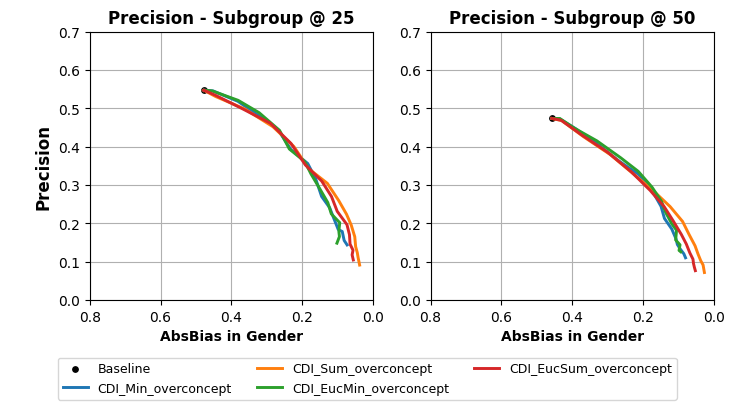

In [231]:
occ2_c = pd.read_pickle('results/occ2-extra_concepts.pkl')

print(occ2_c['name'].unique())
print(occ2_c['k'].unique())

colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', 'purple', 'red', 'orange', 'green', 'blue', 'indigo', 'violet']

ks = [25, 50]

methods = ['Baseline', 'CDI_Min_overconcept', 'CDI_Sum_overconcept', 'CDI_EucMin_overconcept', 'CDI_EucSum_overconcept']

fig, ax = plt.subplots(1, 2, figsize=(6, 3.4))
q = 0
c = 0
for i, k in enumerate(ks):
    ax[i].set_title(f'Precision - Subgroup @ {k}', weight='bold')
    ax[i].set_ylim(0, .7)
    ax[i].set_xlim(.8, 0)
    ax[i].grid(True)
    if i == 0:
        ax[i].set_ylabel('Precision', weight='bold', fontsize=12)
    ax[i].set_xlabel('AbsBias in Gender', weight='bold')    
    for j, method in enumerate(methods):
        c = colors[j]
        data = occ2_c[(occ2_c['name'] == method) & (occ2_c['k'] == k)]
        if method in ['Baseline', 'DebiasClip']:
            ax[i].scatter(np.mean(data['Avg_AbsBias_gender']), np.mean(data['Avg_Precision']), label=method, s=15, c='black')
        else:
            avg_c = avg_cats(data, "tol")
            #pareto_front = is_pareto_efficient_simple(avg_c, metric, 'Avg_Precision')
            pareto_points = avg_c #avg_c.iloc[pareto_front]
            ax[i].plot(pareto_points['Avg_AbsBias_gender'], pareto_points['Avg_Precision'], label=method, c=c, linewidth=2.1)

    handles1, labels1 = ax[i].get_legend_handles_labels()


fig.legend(handles1, labels1, loc='lower center', ncols=3, fontsize=9)
fig.tight_layout(rect=[0, 0, 1.2, 1.2])
fig.subplots_adjust(bottom=0.3)
fig.show()